# Project Name - Shopper Spectrum: Customer Segmentation and Product Recommendation in E-Commerence

## Project Type - EDA and model training

## Contribution - Individual

# Project Summary - 

# GitHub Link - 

# Problem Statement - 
>The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# Let's Begin !

# 1. Know Your Data

## 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Dataset Loading

In [2]:
df = pd.read_csv(r'D:\Deepam\Projects\Shopper Spectrum Customer Segmentation and Product recommendations\online_retail.csv')

## 1.3 Dataset First View

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


## 1.4 Dataset Rows and Columns count

In [4]:
row, column = df.shape
print(f"No. of rows in the dataset: {row}")
print(f"No. of columns in the dataset: {column}")

No. of rows in the dataset: 541909
No. of columns in the dataset: 8


## 1.5 Dataset Information

In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [8]:
# Checking if null values are present?
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
(df['CustomerID'].isnull().sum()/len(df['CustomerID']))*100
# ~25% percentage of data is missing in CustomerID column

24.926694334288598

In [10]:
(df['Description'].isnull().sum()/len(df['Description']))*100
# ~0.26 percent of datas are mssing in Description column

0.2683107311375157

In [11]:
df.shape

(541909, 8)

### Dropping rows which has missing values

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(406829, 8)

In [14]:
df["InvoiceNo"].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [15]:
df["InvoiceNo"].nunique()

22190

In [16]:
# Counting number of cancelled invoices
df["InvoiceNo"].str.startswith('C').value_counts()

InvoiceNo
False    397924
True       8905
Name: count, dtype: int64

In [17]:
# Storing cancelled invoiceNo in a different dataframe
cancelled_df = df[df['InvoiceNo'].str.startswith('C')]
cancelled_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


In [18]:
# Removing rows that has cancelleg invoiceno
df = df[~df['InvoiceNo'].str.startswith('C')]

In [19]:
df.shape

(397924, 8)

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
# Checking if Quantity or UnitPrice is negative or not
df[(df['UnitPrice']<=0) | (df['Quantity']<=0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2022-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2022-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2022-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2023-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2023-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2023-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2023-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2023-04-04 14:42:00,0.0,14410.0,United Kingdom


In [22]:
df[df['UnitPrice']==0].shape[0] # there are 40 rows which has per unit price = 0, which could be error, so dropping such 40 rows.

40

In [23]:
df.shape

(397924, 8)

In [24]:
# removing rows which has per unit price = 0
df = df[df['UnitPrice']>0]

In [25]:
df.shape

(397884, 8)

In [26]:
# Adding a new columns named total price
df = df.copy()
df['TotalPrice'] = df['UnitPrice']*df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France,16.60


In [27]:
# Observing each country's total price to see if there's currency related problem
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# since the number of customer from uk is about 91% the total price was bound to have highest in their case, no currency isn't as issue here

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [28]:
# changing the format for InvoiceDate column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [29]:
df['Year'] = df['InvoiceDate'].dt.year

In [30]:
df['Month'] = df['InvoiceDate'].dt.month

In [31]:
df['Day'] = df['InvoiceDate'].dt.day

In [32]:
df['Hour'] = df['InvoiceDate'].dt.hour

In [33]:
df['Weekday'] = df['InvoiceDate'].dt.dayofweek

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022,12,1,8,3
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022,12,1,8,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3


In [35]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
Year           0
Month          0
Day            0
Hour           0
Weekday        0
dtype: int64

In [36]:
# To check if there exists duplicated values
df.duplicated().sum()

5192

In [37]:
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Weekday
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2022-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,2022,12,1,11,3
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2022-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10,2022,12,1,11,3
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2022-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95,2022,12,1,11,3
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2022-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95,2022,12,1,11,3
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2022-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95,2022,12,1,11,3


In [38]:
# Dropping duplicated values
df = df.drop_duplicates()

In [39]:
df.shape

(392692, 14)

### The data is cleaned now 

In [40]:
# Saving the cleaned data
df.to_csv("cleaned_Shopper_Spectrum_data.csv", index=False)

# 2. EDA Analysis

## 2.1 Top-level KPIs (Key Performance Indicators)

In [41]:
# Calculating total number of transactions
total_transactions = df['InvoiceNo'].nunique()
print("Total Transactions:", total_transactions)

Total Transactions: 18532


In [42]:
# Calculating total revenve
total_revenve = df['TotalPrice'].sum()
print("Total revenue in $:", total_revenve)

Total revenue in $: 8887208.894


In [43]:
# Finding total number of unique customers
unique_customers = df['CustomerID'].nunique()
print("Total unique customer:", unique_customers)

Total unique customer: 4338


In [44]:
# Finding unique products sold
unique_products = df['Description'].nunique()
print("Total unique products sold:", unique_products)

Total unique products sold: 3877


In [45]:
# Finding top 5 selling products
top_products = (
    df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 selling products are:\n", top_products)

Top 5 selling products are:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
Name: Quantity, dtype: int64


In [46]:
# Finding most active countries by transactions
top_active_countries = (
    df.groupby('Country')['InvoiceNo']
    .nunique()
    .sort_values(ascending=False)
    .head(5)
)
print("Top 5 active countries are:\n", top_active_countries)

Top 5 active countries are:
 Country
United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Name: InvoiceNo, dtype: int64


## 2.2 Temporal Analysis

In [47]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022,12,1,8,3
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022,12,1,8,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3


In [48]:
# Finding sales per year
sales_per_year = (
    df.groupby('Year')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Sales per year is as follows in $:\n", sales_per_year)

Sales per year is as follows in $:
 Year
2023    8316786.164
2022     570422.730
Name: TotalPrice, dtype: float64


In [49]:
sales_of_2022 = (
    df[df['Year']==2022].groupby('Month')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print("Sales of 2022 is as follows in $:\n", sales_of_2022)
# which means for 2022 the data for sales is of 12th month i.e. december

Sales of 2022 is as follows in $:
 Month
12    570422.73
Name: TotalPrice, dtype: float64


In [50]:
df[df['Year']==2022]['Month'].nunique()

1

In [51]:
# Finding sales by month
sales_by_month = (
    df[(df['Year']==2023)].groupby('Month')['TotalPrice']
    .sum()
    .sort_index()
    .head(50)
)

print("Sales in each month of 2023 is as follows:\n", sales_by_month)

# in the month of September, Octomber and November the sales are very high, maybe because of winters

Sales in each month of 2023 is as follows:
 Month
1      568101.310
2      446084.920
3      594081.760
4      468374.331
5      677355.150
6      660046.050
7      598962.901
8      644051.040
9      950690.202
10    1035642.450
11    1156205.610
12     517190.440
Name: TotalPrice, dtype: float64


In [52]:
sales_monthwise_eachyear = (
    df.groupby(['Year', 'Month'])['TotalPrice']
    .sum()
    .sort_index()
    .head(50)
)

print("Sales monthwise for both the years is as follows in $:\n", sales_monthwise_eachyear)

Sales monthwise for both the years is as follows in $:
 Year  Month
2022  12        570422.730
2023  1         568101.310
      2         446084.920
      3         594081.760
      4         468374.331
      5         677355.150
      6         660046.050
      7         598962.901
      8         644051.040
      9         950690.202
      10       1035642.450
      11       1156205.610
      12        517190.440
Name: TotalPrice, dtype: float64


In [53]:
# Finding sales by day
sales_weekdaywise = (
    df.groupby(['Weekday'])['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Sales on weekday is as follows in $:\n", sales_weekdaywise)

Sales on weekday is as follows in $:
 Weekday
4    1973015.730
2    1697733.801
3    1584283.830
5    1483080.811
1    1363604.401
Name: TotalPrice, dtype: float64


In [54]:
sales_hourly_basis = (
    df.groupby('Hour')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("Sales on hourlybasis for is as follows in $:\n", sales_hourly_basis)
# the sales are high during the time from 10am to 3pm

Sales on hourlybasis for is as follows in $:
 Hour
12    1373695.390
10    1259267.591
13    1168724.200
11    1101177.600
14     991992.821
15     963559.680
9      842392.341
16     467380.560
8      281997.790
17     233811.591
Name: TotalPrice, dtype: float64


## 2.3 Revenue-Based Insights

In [55]:
## top countries with most sales
sales_per_country = (
    df.groupby('Country')['TotalPrice']
    .sum()
    .loc[lambda x: x>70000]
    .sort_values(ascending=False)
)
print("Top countries with sales greater than 70000$ is as follows:\n", sales_per_country)

Top countries with sales greater than 70000$ is as follows:
 Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Name: TotalPrice, dtype: float64


In [56]:
## finding customers purchasing our products the most
sales_by_customers = (
    df.groupby('CustomerID')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(25)
)

customer_countries = df[['CustomerID', 'Country']].drop_duplicates().set_index('CustomerID')

top_customers_with_country = sales_by_customers.to_frame().join(customer_countries)
print("top 25 Customers with most sales is as follows in $:\n", top_customers_with_country)

top 25 Customers with most sales is as follows in $:
             TotalPrice         Country
CustomerID                            
14646.0      280206.02     Netherlands
18102.0      259657.30  United Kingdom
17450.0      194390.79  United Kingdom
16446.0      168472.50  United Kingdom
14911.0      143711.17            EIRE
12415.0      124914.53       Australia
14156.0      117210.08            EIRE
17511.0       91062.38  United Kingdom
16029.0       80850.84  United Kingdom
12346.0       77183.60  United Kingdom
16684.0       66653.56  United Kingdom
14096.0       65164.79  United Kingdom
13694.0       65039.62  United Kingdom
15311.0       60632.75  United Kingdom
13089.0       58762.08  United Kingdom
17949.0       58510.48  United Kingdom
15769.0       56252.72  United Kingdom
15061.0       54534.14  United Kingdom
14298.0       51527.30  United Kingdom
14088.0       50491.81  United Kingdom
15749.0       44534.30  United Kingdom
12931.0       42055.96  United Kingdom
17841.0   

In [57]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2022,12,1,8,3
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2022,12,1,8,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2022,12,1,8,3


## 2.4 Product Based Insights

In [58]:
# finding which products are bought the most in terms of quantity
most_selling_prod = (
    df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 most selling products in terms of quantity are:\n", most_selling_prod)

Top 10 most selling products in terms of quantity are:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


In [59]:
# finding which products are bought the most in terms of revenue

most_selling_prod_by_revn = (
    df.groupby('Description')['TotalPrice']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 selling products in terms of revenue:\n", most_selling_prod_by_revn)

Top 10 selling products in terms of revenue:
 Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalPrice, dtype: float64


In [60]:
quantity_of_cakestand_sold = df[df['Description'] == 'REGENCY CAKESTAND 3 TIER']['Quantity'].sum()
quantity_of_cakestand_sold

12374

# 3. Visual EDA

## 3.1 Histograms (to find what is the distribution of numeric columns)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

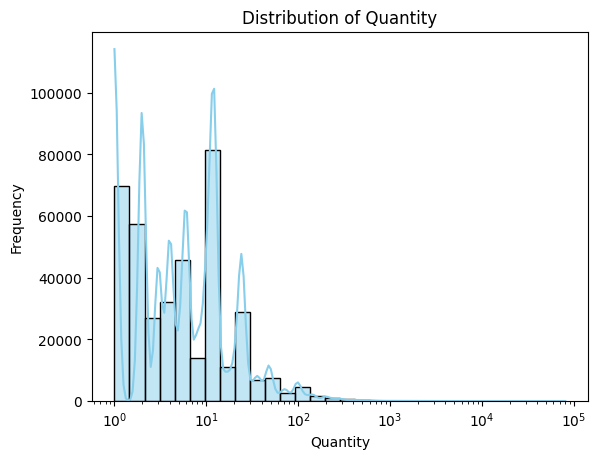

In [62]:
# plot histogram for quantity
sns.histplot(df['Quantity'], bins=30, kde=True, color='skyblue', log_scale=True);
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

# The distribution is skewed towards right, i.e it has positive skewness

In [63]:
# skewness
skewness = df['Quantity'].skew()
print("Skewness:", skewness)

# calcuclating kurtosis for outlier detection
kurtosis = df['Quantity'].kurt()
print("Kurtosis:", kurtosis)

# Standard Deviation
std_dev = df['Quantity'].std()
print("Standard Deviation:", std_dev)

# Mean
mean = df['Quantity'].mean()
print("Mean:", mean)

# Coefficient of Variation
cv = std_dev / mean
print("Coefficient of Variation:", cv)
# Extremely worse data this is

Skewness: 407.3456626876272
Kurtosis: 175940.08511259107
Standard Deviation: 180.49283198902435
Mean: 13.1197019547126
Coefficient of Variation: 13.757388133668028


C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\2750676295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = np.log1p(df['Quantity'])


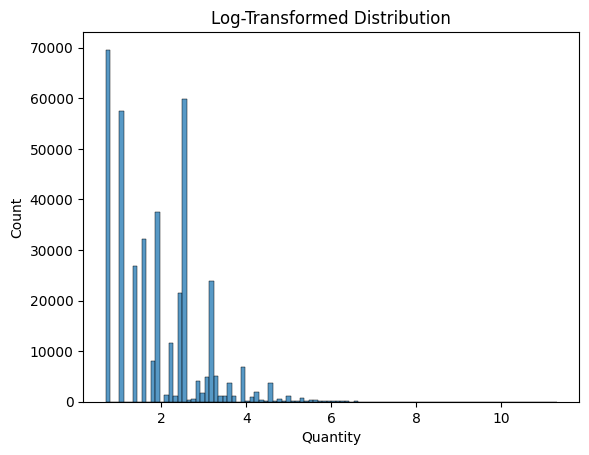

In [64]:
df['Quantity'] = np.log1p(df['Quantity'])
sns.histplot(df['Quantity'], bins=100)
plt.title("Log-Transformed Distribution");

In [65]:
# skewness
skewness = df['Quantity'].skew()
print("Skewness:", skewness)

# calcuclating kurtosis for outlier detection
kurtosis = df['Quantity'].kurt()
print("Kurtosis:", kurtosis)

# Standard Deviation
std_dev = df['Quantity'].std()
print("Standard Deviation:", std_dev)

# Mean
mean = df['Quantity'].mean()
print("Mean:", mean)

# Coefficient of Variation
cv = std_dev / mean
print("Coefficient of Variation:", cv)

Skewness: 0.8197414248820475
Kurtosis: 0.8501634825294477
Standard Deviation: 1.0007786030167791
Mean: 1.929854439910983
Coefficient of Variation: 0.518577247236813


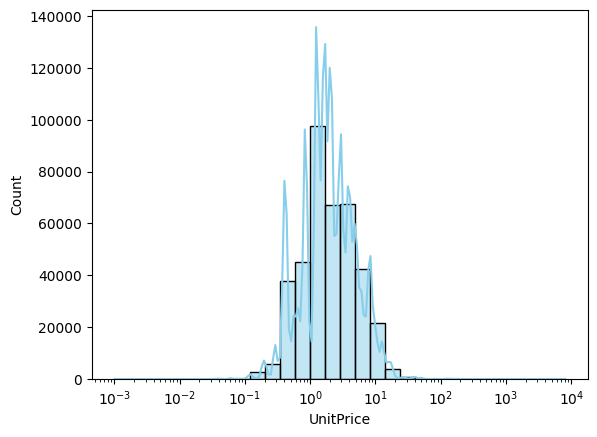

In [66]:
# plot histogram for UnitPrice
sns.histplot(df['UnitPrice'], bins=30, kde=True, color='skyblue', log_scale=True);


In [67]:
# skewness
skewness = df['UnitPrice'].skew()
print("Skewness:", skewness)

# calcuclating kurtosis for outlier detection
kurtosis = df['UnitPrice'].kurt()
print("Kurtosis:", kurtosis)

# Standard Deviation
std_dev = df['UnitPrice'].std()
print("Standard Deviation:", std_dev)

# Mean
mean = df['UnitPrice'].mean()
print("Mean:", mean)

# Coefficient of Variation
cv = std_dev / mean
print("Coefficient of Variation:", cv)

# Extremely worse data this is

Skewness: 202.74086107358727
Kurtosis: 57398.33504229725
Standard Deviation: 22.2418356140519
Mean: 3.125913907082396
Coefficient of Variation: 7.1153065232086155


C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\1921759389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPrice'] = np.log1p(df['UnitPrice'])


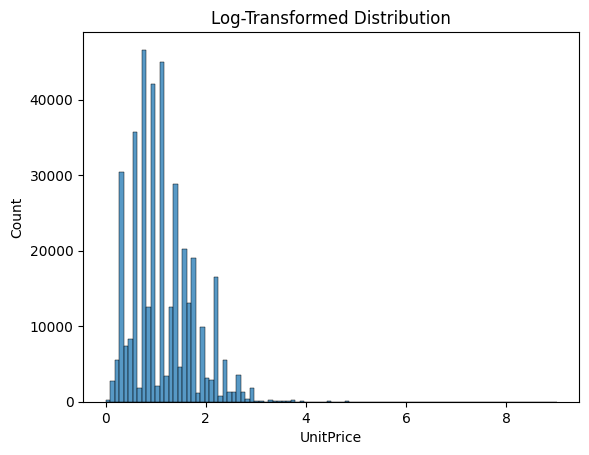

In [68]:
df['UnitPrice'] = np.log1p(df['UnitPrice'])
sns.histplot(df['UnitPrice'], bins=100)
plt.title("Log-Transformed Distribution");

In [69]:
# skewness
skewness = df['UnitPrice'].skew()
print("Skewness:", skewness)

# calcuclating kurtosis for outlier detection
kurtosis = df['UnitPrice'].kurt()
print("Kurtosis:", kurtosis)

# Standard Deviation
std_dev = df['UnitPrice'].std()
print("Standard Deviation:", std_dev)

# Mean
mean = df['UnitPrice'].mean()
print("Mean:", mean)

# Coefficient of Variation
cv = std_dev / mean
print("Coefficient of Variation:", cv)

# Extremely worse data this is

Skewness: 0.9392100749825805
Kurtosis: 2.085139264115182
Standard Deviation: 0.6024891386243789
Mean: 1.156192533523005
Coefficient of Variation: 0.5210975863929422


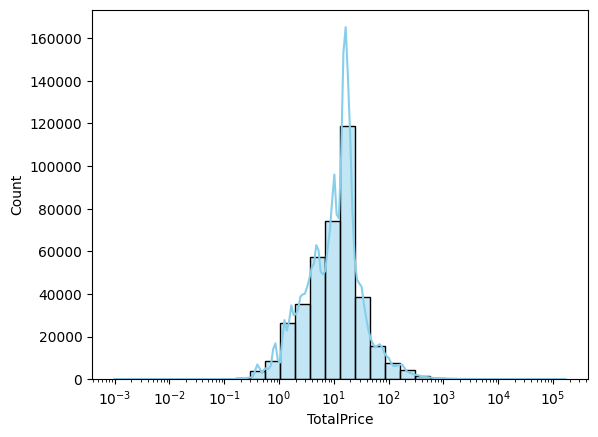

In [70]:
# plot histogram for quantity
sns.histplot(df['TotalPrice'], bins=30, kde=True, color='skyblue', log_scale=True);
# this plot has low skewness which is negligle

In [71]:
# skewness
skewness = df['TotalPrice'].skew()
print("Skewness:", skewness)

# calcuclating kurtosis for outlier detection
kurtosis = df['TotalPrice'].kurt()
print("Kurtosis:", kurtosis)

# Standard Deviation
std_dev = df['TotalPrice'].std()
print("Standard Deviation:", std_dev)

# Mean
mean = df['TotalPrice'].mean()
print("Mean:", mean)

# Coefficient of Variation
cv = std_dev / mean
print("Coefficient of Variation:", cv)

# Extremely worse data this is

Skewness: 448.52177890677456
Kurtosis: 229148.8571979903
Standard Deviation: 311.0992243348036
Mean: 22.6314997351614
Coefficient of Variation: 13.746292909235029


C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\2001687298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = np.log1p(df['TotalPrice'])


Text(0.5, 1.0, 'Log-transformed distribution')

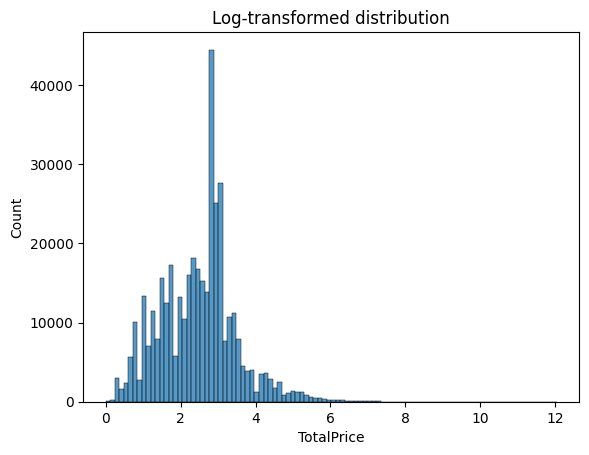

In [72]:
df['TotalPrice'] = np.log1p(df['TotalPrice'])
sns.histplot(df['TotalPrice'], bins=100)
plt.title("Log-transformed distribution")

In [73]:
# skewness
skewness = df['TotalPrice'].skew()
print("Skewness:", skewness)

# calcuclating kurtosis for outlier detection
kurtosis = df['TotalPrice'].kurt()
print("Kurtosis:", kurtosis)

# Standard Deviation
std_dev = df['TotalPrice'].std()
print("Standard Deviation:", std_dev)

# Mean
mean = df['TotalPrice'].mean()
print("Mean:", mean)

# Coefficient of Variation
cv = std_dev / mean
print("Coefficient of Variation:", cv)

# Extremely worse data this is

Skewness: 0.4201252935237457
Kurtosis: 0.9551677915216947
Standard Deviation: 1.016043453818746
Mean: 2.4687735033202562
Coefficient of Variation: 0.4115579871755218


## 3.2 Bar Plots (to compare categories easily)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
  Text(1, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(2, 0, 'WORLD WAR 2 GLIDERS ASSTD DESIGNS'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'WHITE HANGING HEART T-LIGHT HOLDER')])

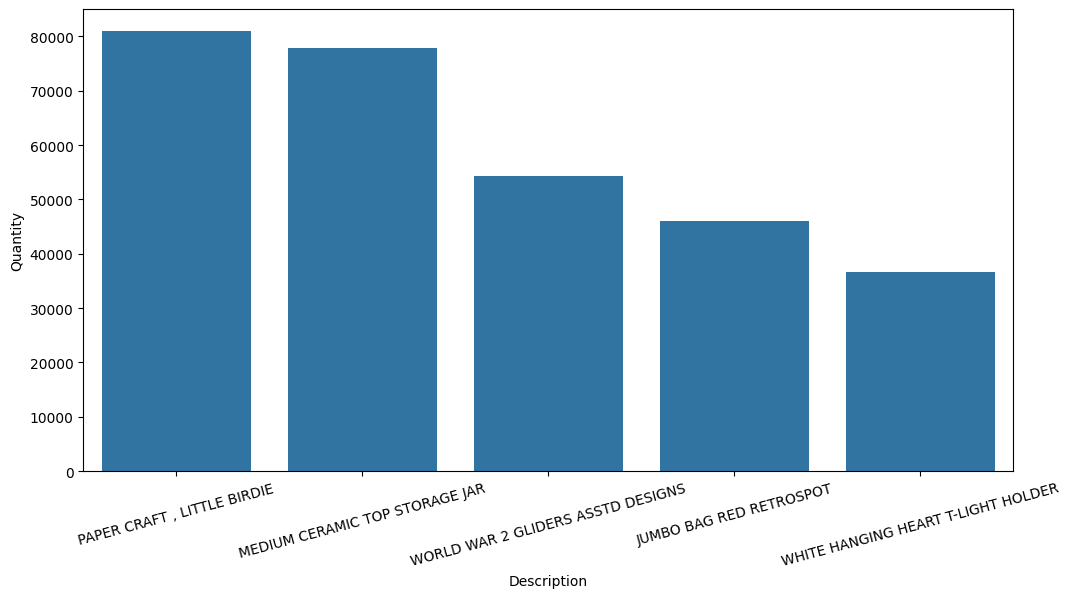

In [74]:
# visualizing top products by quantity
plt.figure(figsize=(12, 6))
sns.barplot(top_products);
plt.xticks(rotation=15)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'PAPER CRAFT , LITTLE BIRDIE'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'MEDIUM CERAMIC TOP STORAGE JAR'),
  Text(5, 0, 'POSTAGE'),
  Text(6, 0, 'PARTY BUNTING'),
  Text(7, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(8, 0, 'Manual'),
  Text(9, 0, 'RABBIT NIGHT LIGHT')])

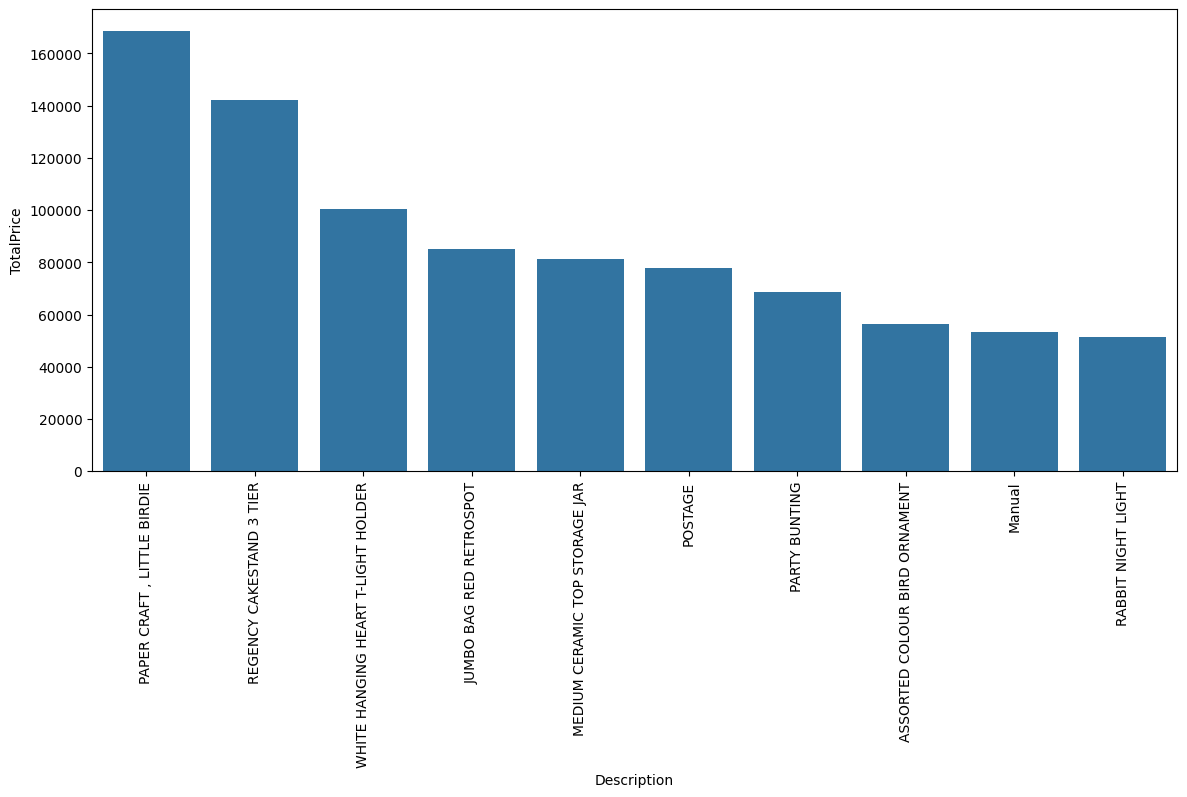

In [75]:
# visualizing top products by totalprice
plt.figure(figsize=(14,6))
sns.barplot(most_selling_prod_by_revn);
plt.xticks(rotation=90)

## 3.3 Time Series Line Plots (to see how sales evolved over time)

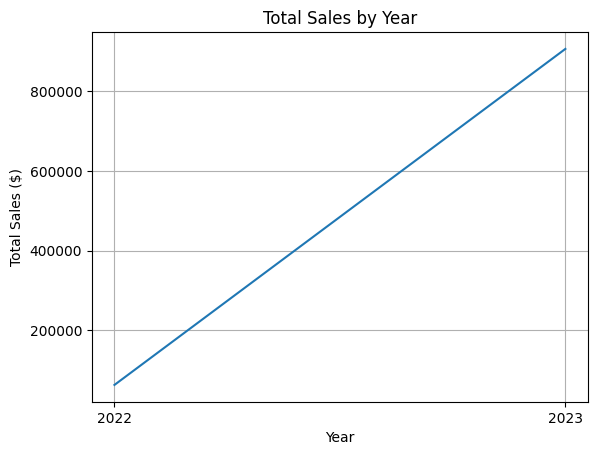

In [76]:
# visualizing sales by year

# Ensure it's a proper DataFrame
sales_per_year = df.groupby('Year')['TotalPrice'].sum().reset_index()

sns.lineplot(data=sales_per_year.reset_index(), x='Year', y='TotalPrice', markers='o');
plt.title("Total Sales by Year")
plt.grid(True)
plt.xticks(sales_per_year['Year'])  # show only integer years
plt.ylabel("Total Sales ($)");

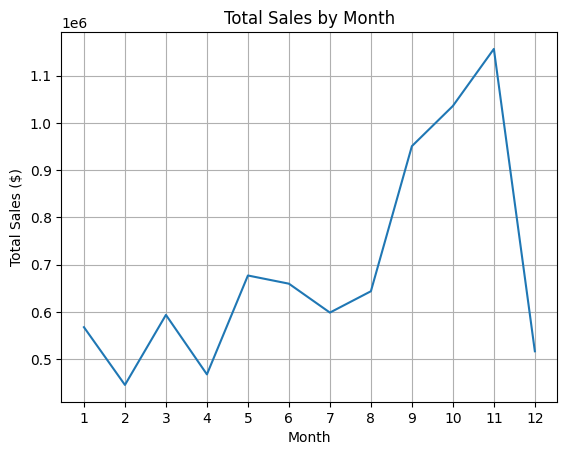

In [77]:
# visualizing sales by month
sns.lineplot(data=sales_by_month.reset_index(), x='Month', y='TotalPrice', markers='o')

sales_by_month = sales_by_month.reset_index()
plt.title("Total Sales by Month")
plt.grid(True)
plt.xticks(sales_by_month['Month'])  # show only integer months
plt.ylabel("Total Sales ($)");

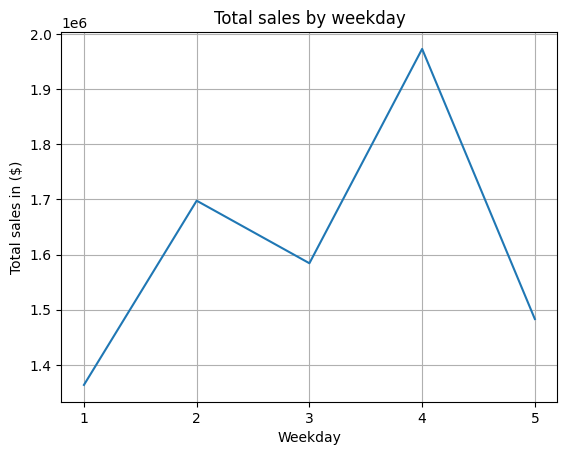

In [78]:
# visualizing sales by month
sns.lineplot(sales_weekdaywise.reset_index(), x='Weekday', y='TotalPrice', markers='o')

sales_weekdaywise = sales_weekdaywise.reset_index()
plt.title("Total sales by weekday")
plt.grid(True)
plt.xticks(sales_weekdaywise['Weekday'])
plt.ylabel("Total sales in ($)");

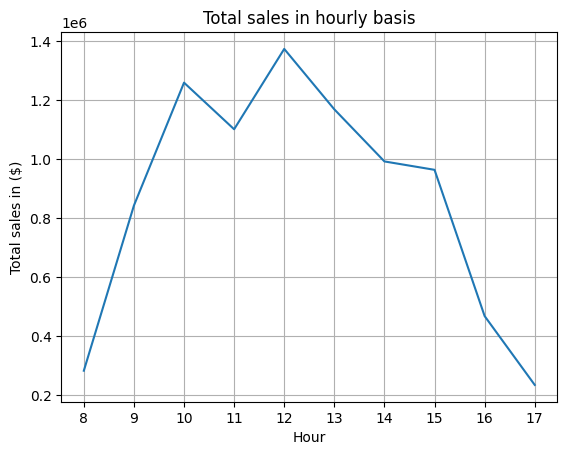

In [79]:
# visualizing sales by hour

sns.lineplot(sales_hourly_basis.reset_index(), x='Hour', y='TotalPrice', markers='o' )

sales_hourly_basis = sales_hourly_basis.reset_index()
plt.title("Total sales in hourly basis")
plt.grid(True)
plt.xticks(sales_hourly_basis['Hour'])
plt.ylabel("Total sales in ($)");

##  3.4 Boxplots - (to Detect outliers clearly)

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\2437448946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = np.log1p(df['TotalPrice'])


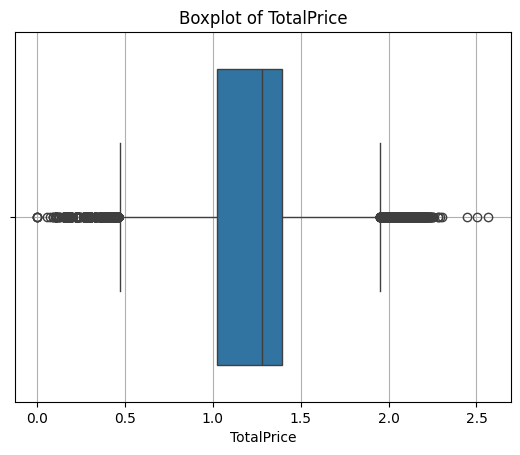

In [80]:
# visualizing totalprice's boxplot is if it contains outliers

df['TotalPrice'] = np.log1p(df['TotalPrice'])
sns.boxplot(x=df['TotalPrice'])
plt.title("Boxplot of TotalPrice")
plt.grid(True)
plt.show()

# It has many outliers it needs to be treated

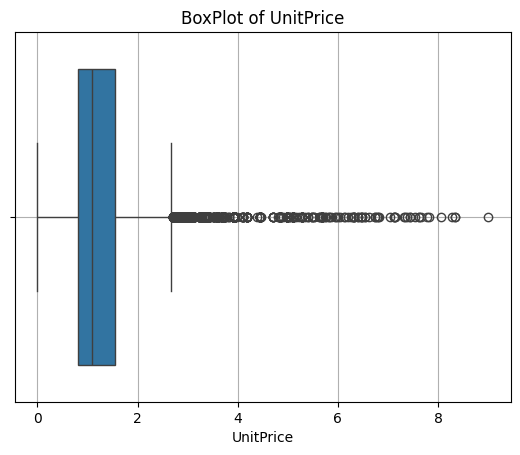

In [81]:
# visualizing unitprice's boxplot is if it contains outliers

sns.boxplot(x=df['UnitPrice'])
plt.title("BoxPlot of UnitPrice")
plt.grid(True)
plt.show()

# It has also has outliers it needs to be treated

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\3828477221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = np.log1p(df['Quantity'])


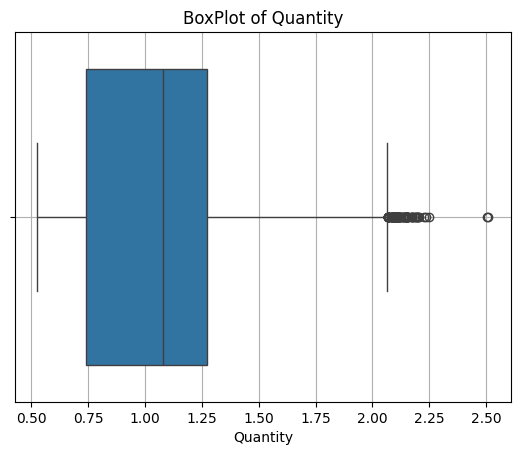

In [82]:
# visualizing quantity's boxplot is if it contains outliers

df['Quantity'] = np.log1p(df['Quantity'])
sns.boxplot(x=df['Quantity'])
plt.title("BoxPlot of Quantity")
plt.grid(True)
plt.show()
# It has also has outliers it needs to be treated

##  3.5 Heatmaps (to how columns correlate with each other)

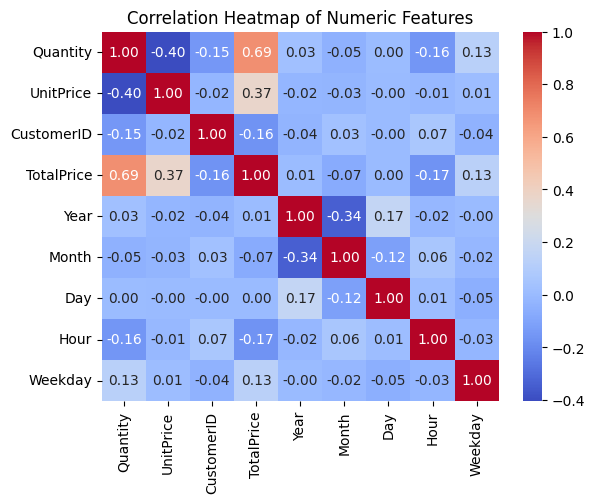

In [83]:
corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## 3.6 Pie/Donut Charts (to show parts of a whole)

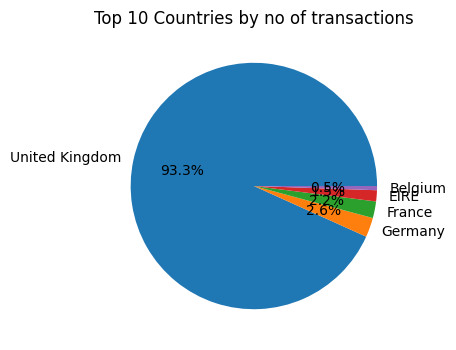

In [84]:
# Pie chart
top_active_countries.plot(kind='pie', autopct='%1.1f%%', figsize=(4,4), ylabel='')
plt.title("Top 10 Countries by no of transactions")
plt.show();

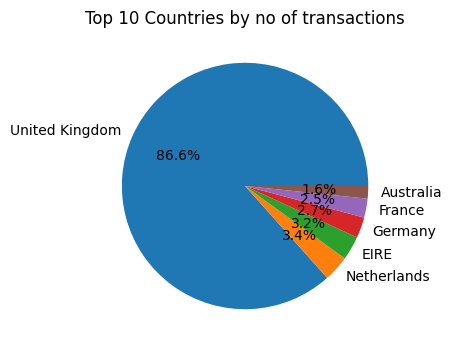

In [85]:
# Pie chart
sales_per_country.plot(kind='pie', autopct='%1.1f%%', figsize=(4,4), ylabel='')
plt.title("Top 10 Countries by no of transactions")
plt.show();

## 4. RFM Feature Engineering 

In [86]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Year,Month,Day,Hour,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1.080418,2022-12-01 08:26:00,1.266948,17850.0,United Kingdom,1.332673,2022,12,1,8,3
1,536365,71053,WHITE METAL LANTERN,1.080418,2022-12-01 08:26:00,1.479329,17850.0,United Kingdom,1.401327,2022,12,1,8,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,1.162283,2022-12-01 08:26:00,1.321756,17850.0,United Kingdom,1.419607,2022,12,1,8,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,1.080418,2022-12-01 08:26:00,1.479329,17850.0,United Kingdom,1.401327,2022,12,1,8,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,1.080418,2022-12-01 08:26:00,1.479329,17850.0,United Kingdom,1.401327,2022,12,1,8,3


### 4.1 Compute RFM features

In [87]:
# Recency = Days since their last purchase from a given reference date = Recent buyers are more likely to buy again
# Frequency = (F) Total number of purchases = Frequent buyers are loyal
# Monetary (M) Total amount spent by customer = Big spenders are high-value

reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby("CustomerID").agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, # Recency,
    'InvoiceNo': 'nunique',                                   # Frequency
    'TotalPrice': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [88]:
# Exporting RFM Table
# Store as CSV for use in modeling, dashboards, etc.

rfm.to_csv("RFM_Features.csv", index=False)

## 4.2 RFM Distribution Visualization (EDA + Interpretation)

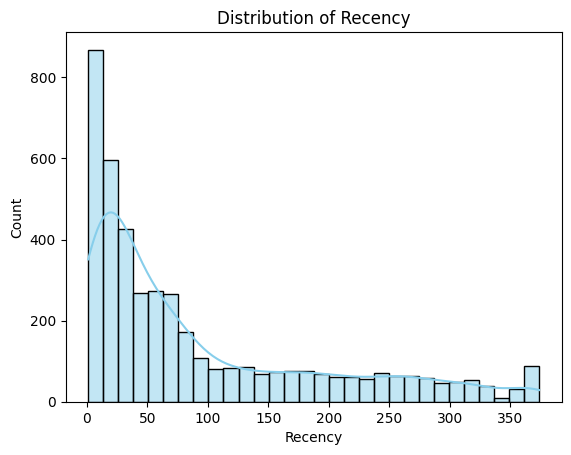

In [89]:
# Histogram plot for Recency
sns.histplot(data=rfm, x='Recency', bins=30, kde=True, color='skyblue')
plt.title("Distribution of Recency")
plt.show()

In [90]:
# the right skewed distribution shows most customers have purchased recently, so this is a good sign.
# but there are mid-range customers, whose recency>300 days, which is also a problem.

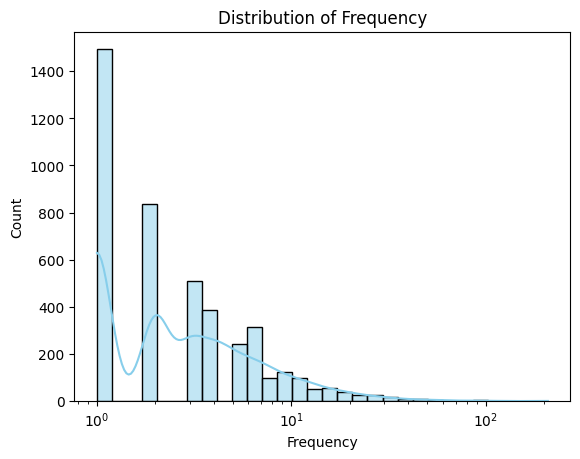

In [91]:
# Histogram plot for Frequency
sns.histplot(data=rfm, x='Frequency', bins=30, kde=True, color='skyblue', log_scale=True)
plt.title("Distribution of Frequency")
plt.show()

In [92]:
# This is also right skewed plot means, most customers have number of purchases between [1, 15], 
# while there are quite few people which has more number of purchases 

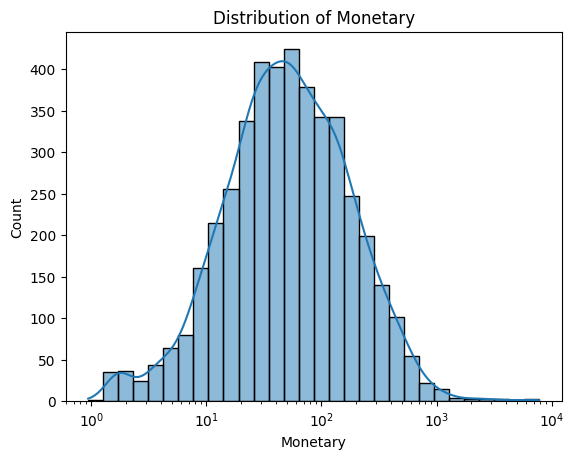

In [93]:
# Histogram for Monetary
sns.histplot(data=rfm, x='Monetary', bins=30, kde=True, log_scale=True)
plt.title("Distribution of Monetary")
plt.show()

In [94]:
# This is a mostly perfect a bell curve distribution
# about 95% of customers has transaction amount in the range of [5, 120] $

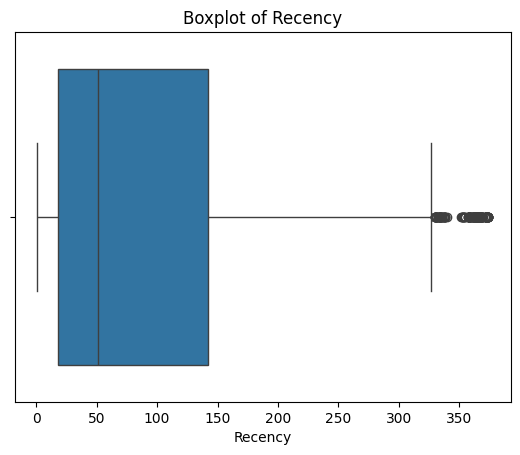

In [95]:
# boxplot for recency to detect outliers
sns.boxplot(data=rfm, x='Recency')
plt.title("Boxplot of Recency")
plt.show()

# There exist many outliers in recency

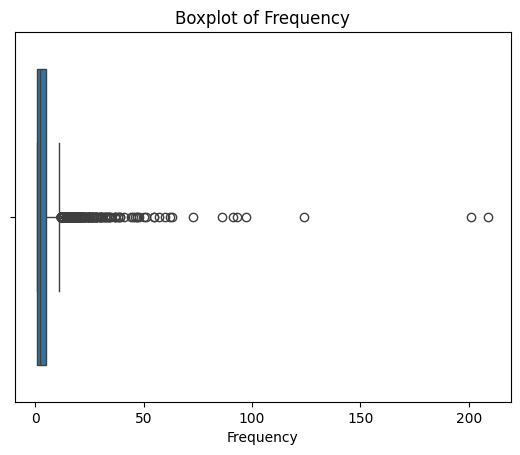

In [96]:
# Boxplot for Frequency
sns.boxplot(data=rfm, x="Frequency")
plt.title("Boxplot of Frequency")
plt.show()

# There exist many outliers in frequency

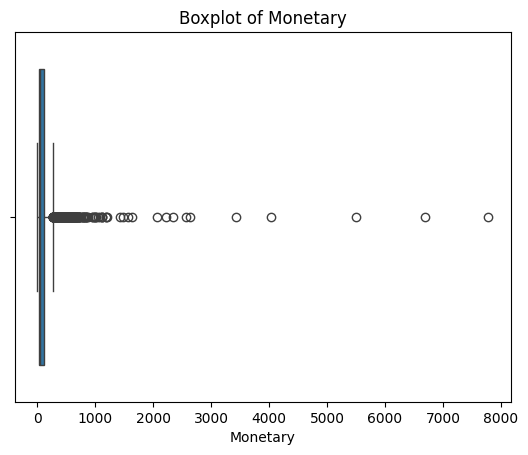

In [97]:
# Boxplot of monetary
sns.boxplot(data=rfm, x='Monetary')
plt.title("Boxplot of Monetary")
plt.show()

# There exist many outliers in monetary

# 5. Calculating RFM scores which helps in better clustering

In [98]:
# Recency: lower is better
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5,4,3,2,1])  # Lower recency = higher score

# Frequency: higher is better
freq_bins = pd.qcut(rfm['Frequency'], q=5, duplicates='drop')
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=5, labels=range(1, len(freq_bins.cat.categories)+1), duplicates='drop') # Higher frequency = higher score

# Monetary: higher is better
mon_bins = pd.qcut(rfm['Monetary'], q=5, duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=range(1, len(mon_bins.cat.categories)+1), duplicates='drop')  # Higher monetary = higher score

## 5.1  Standardize/Normalize the RFM values

In [99]:
from sklearn.preprocessing import StandardScaler

# Selecting raw RFM values
rfm_raw = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardizing
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_raw)

# This will convert the RFM matrix into a NumPy array of scaled values.

### 5.2  Determine Optimal Number of Clusters

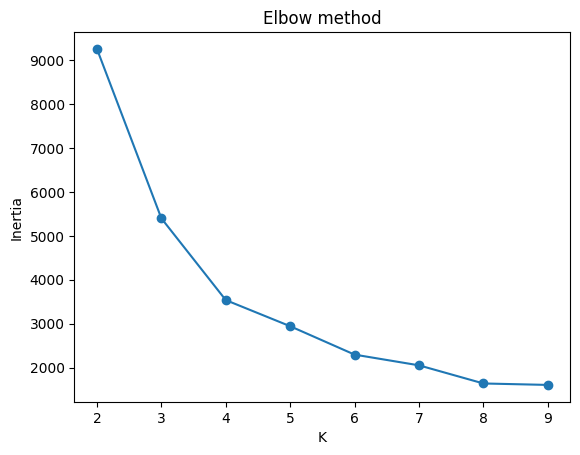

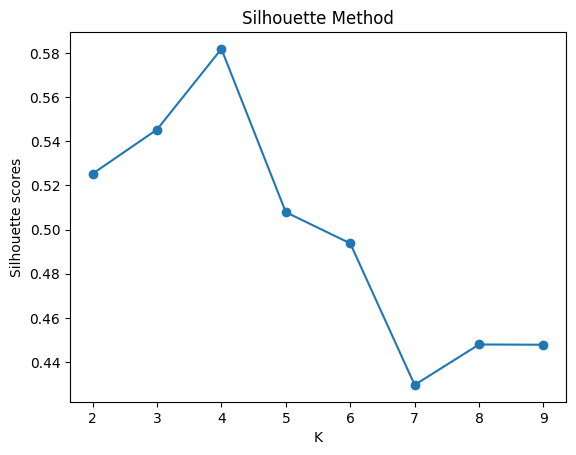

In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
K = range(2,10) # we will try to form clusters from 2 to 9 and compare sil_scores for each
 
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot Elbow
plt.plot(K, inertia, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow method")
plt.show()

# Plot silhouette score
plt.plot(K, sil_scores, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette scores")
plt.title("Silhouette Method")
plt.show()

### 5.3 Run Final Clustering (we will keep clusters = 4, because that is where elbow occurs)

In [117]:
kmeans = KMeans(n_clusters=4, random_state=1)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [118]:
rfm.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,15286.031654,45.418312,3.360790,83.689868
1,15336.457386,249.421402,1.549242,32.166656
2,14656.000000,1.875000,113.125000,4355.788342
3,15328.160714,13.630952,18.205357,463.567954


### 5.4 Visualizing our Clusters

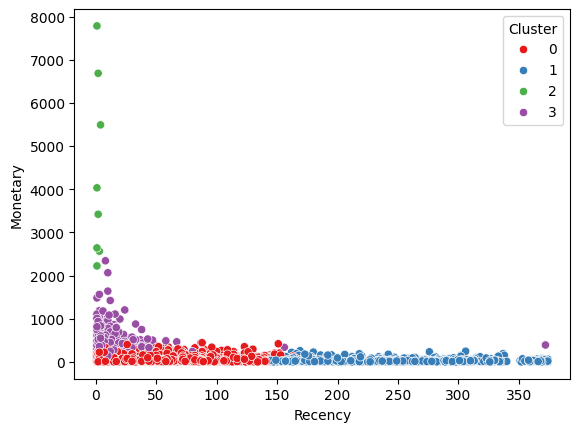

In [119]:
import seaborn as sns
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set1');

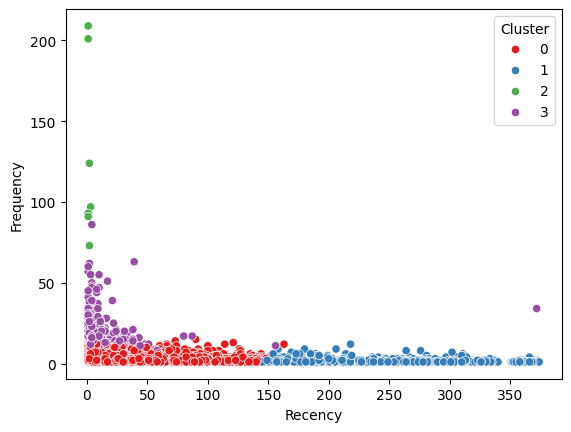

In [120]:
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Cluster', palette='Set1');

## 5.5 using DBScan algorithm

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

rfm_raw2 = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_raw2)

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\4037529868.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_raw2['Cluster'] = dbscan.fit_predict(rfm_scaled)


Cluster
 0    4307
-1      31
Name: count, dtype: int64
           Recency  Frequency     Monetary
Cluster                                   
-1       17.774194  63.096774  1789.666035
 0       93.074530   3.848619    96.348807


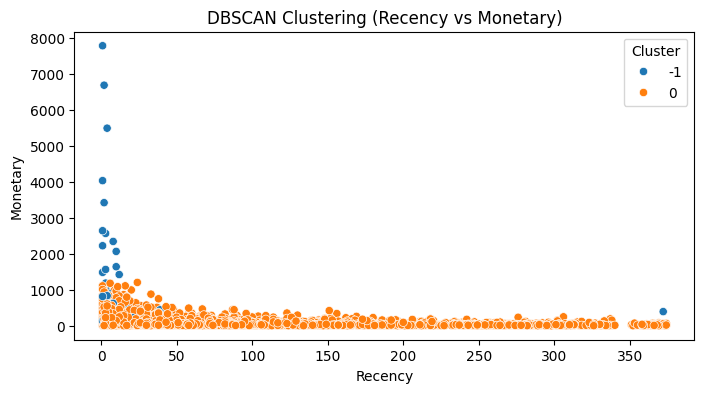

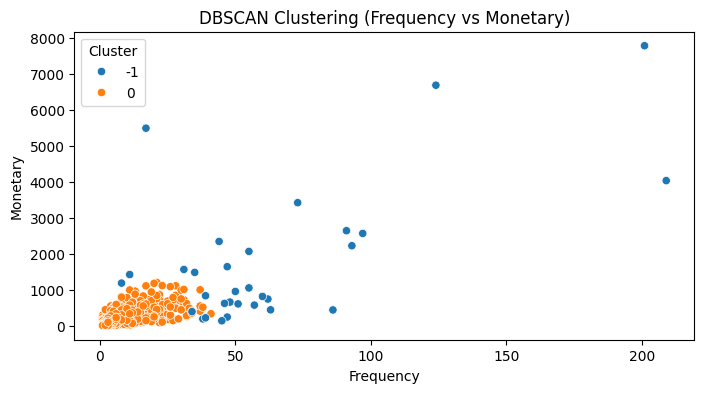

In [115]:
# eps: max distance between 2 points to be considered in the same neighborhood
# min_samples: number of samples (or total weight) in a neighborhood for a point to be considered as a core point

dbscan = DBSCAN(eps=0.8, min_samples=5)
rfm_raw2['Cluster'] = dbscan.fit_predict(rfm_scaled)

# Step 5: Analyzing the clusters
print(rfm_raw2['Cluster'].value_counts())
cluster_summary = rfm_raw2.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Step 6: Visualizing clusters 
plt.figure(figsize=(8,4))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('DBSCAN Clustering (Recency vs Monetary)')
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('DBSCAN Clustering (Frequency vs Monetary)')
plt.show()

# So the Best performing model is Kmeans Clustering

# 6. Saving our best performing model i.e. KMeans model

In [107]:
import joblib

# Saving the trained KMeans model
joblib.dump(kmeans, 'models/rfm_kmeans_model.pkl')

# Saving scaler too, coz it will help in model deployment.
joblib.dump(scaler, 'models/rfm_scaler.pkl')

['models/rfm_scaler.pkl']

# 7. Product Recommendation System 

## 7.1 Creating Customer-Product matrix

In [108]:
df['Description'] = df['Description'].str.strip().str.upper()  # Normalized the descriptions

customer_product = df.groupby(['CustomerID', 'Description'])['Quantity'].sum().unstack().fillna(0)
customer_product = customer_product.applymap(lambda x: 1 if x>0 else 0)

C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\3311131427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'] = df['Description'].str.strip().str.upper()  # Normalized the descriptions
C:\Users\Deepam Shah\AppData\Local\Temp\ipykernel_14344\3311131427.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_product = customer_product.applymap(lambda x: 1 if x>0 else 0)


## 7.2 Compute Cosine-Similarity

In [109]:
product_customer = customer_product.T # transposing our matrix for dot product calculation

# Computing Cosine-Similarity
from sklearn.metrics.pairwise import cosine_similarity
cos_simi_matrix = cosine_similarity(product_customer)
simi_df = pd.DataFrame(cos_simi_matrix, index=product_customer.index, columns=product_customer.index)

##  7.3 Building a recommendation system

In [110]:
def recommend(description, n=5):
    if description not in simi_df:
        return f"{description} not found"
    return simi_df[description].sort_values(ascending=False)[1:n+1]

In [111]:
## verifying the recommendation system
recommend("WHITE HANGING HEART T-LIGHT HOLDER")

Description
RED HANGING HEART T-LIGHT HOLDER     0.543485
CANDLEHOLDER PINK HANGING HEART      0.472557
HEART OF WICKER LARGE                0.411281
HEART OF WICKER SMALL                0.379811
WOODEN PICTURE FRAME WHITE FINISH    0.362919
Name: WHITE HANGING HEART T-LIGHT HOLDER, dtype: float64

## 7.4 Saving our recommendation system

In [112]:
import joblib

# Save the cosine similarity matrix
joblib.dump(simi_df, 'similarity_matrix.pkl')

['similarity_matrix.pkl']

## 7.5 Customer Segmentation System

In [121]:
# Sort by average Monetary
cluster_map = rfm.groupby('Cluster')['Monetary'].mean().sort_values(ascending=False).index

# Map cluster index to label
cluster_labels = {
    cluster_map[0]: 'High-Value',
    cluster_map[1]: 'Regular',
    cluster_map[2]: 'Occasional',
    cluster_map[3]: 'At-Risk'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

In [122]:
def predict_rfm_segment(recency, frequency, monetary):
    import numpy as np
    input_data = scaler.transform([[recency, frequency, monetary]])
    cluster = kmeans.predict(input_data)[0]
    return cluster_labels[cluster]

In [131]:
# Demo for customer segmentation function
print(predict_rfm_segment(300, 5, 400))

At-Risk


C:\Users\Deepam Shah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
